Epoch [100/1000], Loss: 0.1053
Epoch [200/1000], Loss: 0.0533
Epoch [300/1000], Loss: 0.0289
Epoch [400/1000], Loss: 0.0163
Epoch [500/1000], Loss: 0.0092
Epoch [600/1000], Loss: 0.0052
Epoch [700/1000], Loss: 0.0031
Epoch [800/1000], Loss: 0.0019
Epoch [900/1000], Loss: 0.0013
Epoch [1000/1000], Loss: 0.0009


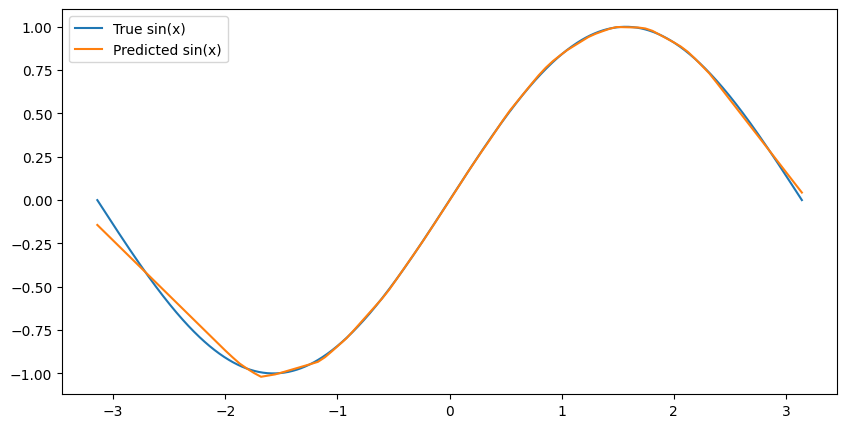

In [14]:
import torch  
import torch.nn as nn  
import torch.optim as optim  
import numpy as np  
import matplotlib.pyplot as plt  
  
# 定义拟合的目标函数(我是用的是三角函数)
def my_sin(x):  
    return np.sin(x)  
  
# 定义神经网络模型 ,继承nn.Module 
class TwoLayerReLUNet(nn.Module):  
    #定义网络层
    def __init__(self, input_size, hidden_size, output_size):  
        super(TwoLayerReLUNet, self).__init__()  
        self.fc1 = nn.Linear(input_size, hidden_size)  #第一个全连接层
        self.relu = nn.ReLU()  
        self.fc2 = nn.Linear(hidden_size, output_size)  #第二个全连接层

    #前向传播函数
    def forward(self, x): 
        # 第一个全连接层 -> ReLu -> 第二个全连接层
        x = self.fc1(x)  
        x = self.relu(x)  
        x = self.fc2(x)  
        return x  
  
# 生成训练数据  
x_train = np.linspace(-np.pi, np.pi, 1000).reshape(-1, 1)  
y_train = my_sin(x_train)  
  
# 转换数据为PyTorch张量  
x_train_tensor = torch.tensor(x_train, dtype=torch.float32)  
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)  
  
# 初始化网络模型、损失函数和优化器  
input_size = x_train_tensor.shape[1]  
hidden_size = 50  # 隐藏层神经元数量，可以进行调整  
output_size = y_train_tensor.shape[1]  
model = TwoLayerReLUNet(input_size, hidden_size, output_size)  
criterion = nn.MSELoss()  #使用均方差作为损失函数
# 定义Adam优化器，并传入模型的参数和学习率
optimizer = optim.Adam(model.parameters(), lr=0.001)  
  
# 训练网络  
num_epochs = 1000  
for epoch in range(num_epochs):  
    # 前向传播 ：计算预测值和损失
    outputs = model(x_train_tensor)  
    loss = criterion(outputs, y_train_tensor)  
      
    # 反向传播和优化：更新网络权重   
    optimizer.zero_grad()  
    loss.backward()  
    optimizer.step()  
      
    if (epoch+1) % 100 == 0:  
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')  
  
# 测试网络  
with torch.no_grad():  
    x_test = np.linspace(-np.pi, np.pi, 100).reshape(-1, 1)  
    x_test_tensor = torch.tensor(x_test, dtype=torch.float32)  
    y_pred = model(x_test_tensor).numpy()  
  
# 绘制结果,绘制真实sin函数曲线和预测曲线  
plt.figure(figsize=(10, 5))  
plt.plot(x_train, y_train, label='True sin(x)')  
plt.plot(x_test, y_pred, label='Predicted sin(x)')  
plt.legend()  
plt.show()